**Ashvini Kawad**

**Decision Tree Assignment**

In [118]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:

data={'Outlook':['sunny','sunny','sunny','sunny','sunny','overcast','overcast','overcast','overcast',
                'rain','rain','rain','rain','rain'],
     'Temp(F)':[75,80,85,72,69,72,83,64,81,71,65,75,68,70],
     'Humidity(%)':[70,90,85,95,70,90,78,65,75,80,70,80,80,96],
     'Windy?':['true','true','false','false','false','true','false','true','false','true','true',
              'false','false','false'],
     'Class':['Play','Dont Play','Dont Play','Dont Play','Play','Play','Play','Play','Play','Dont Play',
              'Dont Play','Play','Play','Play']}

In [120]:
# create Dataframe
df=pd.DataFrame(data)

In [121]:
df

,Outlook,Temp(F),Humidity(%),Windy?,Class
0,sunny,75,70,true,Play
1,sunny,80,90,true,Dont Play
2,sunny,85,85,false,Dont Play
3,sunny,72,95,false,Dont Play
4,sunny,69,70,false,Play
5,overcast,72,90,true,Play
6,overcast,83,78,false,Play
7,overcast,64,65,true,Play
8,overcast,81,75,false,Play
9,rain,71,80,true,Dont Play


In [122]:
# shape of dataframe
df.shape

(14, 5)

In [123]:
# checking null values
df.isnull().sum()

Outlook        0
Temp(F)        0
Humidity(%)    0
Windy?         0
Class          0
dtype: int64

In [124]:
# columns in dataframe
df.columns

Index(['Outlook', 'Temp(F)', 'Humidity(%)', 'Windy?', 'Class'], dtype='object')

In [125]:
df.dtypes

Outlook        object
Temp(F)         int64
Humidity(%)     int64
Windy?         object
Class          object
dtype: object

In [126]:
# information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temp(F)      14 non-null     int64 
 2   Humidity(%)  14 non-null     int64 
 3   Windy?       14 non-null     object
 4   Class        14 non-null     object
dtypes: int64(2), object(3)
memory usage: 688.0+ bytes


In [127]:
# convert Categorical features into numberical features using map function
outlook_mapping={'sunny':0,'overcast':1,'rain':2}

In [128]:
windy_mapping={'true':0,'false':1}

In [129]:
df['Outlook']=df['Outlook'].map(outlook_mapping)
df['Windy?']=df['Windy?'].map(windy_mapping)

In [130]:
df

,Outlook,Temp(F),Humidity(%),Windy?,Class
0,0,75,70,0,Play
1,0,80,90,0,Dont Play
2,0,85,85,1,Dont Play
3,0,72,95,1,Dont Play
4,0,69,70,1,Play
5,1,72,90,0,Play
6,1,83,78,1,Play
7,1,64,65,0,Play
8,1,81,75,1,Play
9,2,71,80,0,Dont Play


**Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)**

In [133]:
from scipy.stats import entropy
# create function to calculate the entropy of features
def calculate_entropy(labels):
    value,counts = np.unique(labels, return_counts=True)
    sum=counts.sum()
    probabilities = counts /sum
    return entropy(probabilities, base=2)




**Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)**

In [107]:
# Function to calculate information gain
def calculate_information_gain(data, feature, threshold):
    # Calculate entropy for the parent node
    entropy_parent = calculate_entropy(data['Class'])

    # Split the dataset based on the threshold
    data_below_threshold = data[data[feature] <= threshold]
    data_above_threshold = data[data[feature] > threshold]

    # Calculate entropy for child nodes
    entropy_below_threshold = calculate_entropy(data_below_threshold['Class'])
    entropy_above_threshold = calculate_entropy(data_above_threshold['Class'])

    # Calculate information gain
    information_gain = entropy_parent - (
            (len(data_below_threshold) / len(data)) * entropy_below_threshold +
            (len(data_above_threshold) / len(data)) * entropy_above_threshold
    )

    return information_gain


In [108]:
# Calculate information gain for Outlook
outlook_information_gain = calculate_information_gain(df, 'Outlook', 0)
print("Information Gain for Outlook:", outlook_information_gain)



Information Gain for Outlook: 0.10224356360985054


In [109]:
# Calculate information gain for Humidity with the threshold of 75
humidity_information_gain = calculate_information_gain(df, 'Humidity(%)', 75)

#print("Information Gain for Outlook:", outlook_information_gain)
print("Information Gain for Humidity:", humidity_information_gain)

Information Gain for Humidity: 0.04533417202914436


In [110]:
def calculate_entropy(data):
    value, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    return entropy_value

# Calculate split information
def calculate_split_information(data, attribute):
    value_counts = data[attribute].value_counts()
    probabilities = value_counts / len(data)
    split_information = -np.sum(probabilities * np.log2(probabilities))
    return split_information

# Calculate gain ratio
def calculate_gain_ratio(data, target, attribute, threshold=75):
    information_gain = calculate_information_gain(data, target, attribute)
    split_information = calculate_split_information(data, attribute)

    if split_information == 0:
        return 0  # To handle the case when split information is 0 (to avoid division by zero)

    gain_ratio = information_gain / split_information
    return gain_ratio

# Compute gain ratios for Outlook and Humidity
gain_ratio_outlook = calculate_gain_ratio(df, 'Class', 'Outlook')
gain_ratio_humidity = calculate_gain_ratio(df, 'Class', 'Humidity(%)', threshold=75)

print(f"Gain Ratio for Outlook: {gain_ratio_outlook}")
print(f"Gain Ratio for Humidity: {gain_ratio_humidity}")

Gain Ratio for Outlook: 0.5960962428591059
Gain Ratio for Humidity: 0.31497959814882387


In [111]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
X=df.drop('Class',axis=1) # input features
X

,Outlook,Temp(F),Humidity(%),Windy?
0,2,75,70,1
1,2,80,90,1
2,2,85,85,0
3,2,72,95,0
4,2,69,70,0
5,0,72,90,1
6,0,83,78,0
7,0,64,65,1
8,0,81,75,0
9,1,71,80,1


In [112]:
y=df['Class']# target variable


In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
model=DecisionTreeClassifier(criterion='entropy') # create model

In [115]:
model.fit(X,y) # training model

DecisionTreeClassifier(criterion='entropy')

In [116]:
from sklearn import tree


[Text(0.5714285714285714, 0.9166666666666666, 'Outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.42857142857142855, 0.75, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7142857142857143, 0.75, 'Temp(F) <= 77.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5714285714285714, 0.5833333333333334, 'Temp(F) <= 73.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.42857142857142855, 0.4166666666666667, 'Windy? <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2857142857142857, 0.25, 'Temp(F) <= 71.0\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.14285714285714285, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.42857142857142855, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7142857142857143, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8571428571428571, 0.583

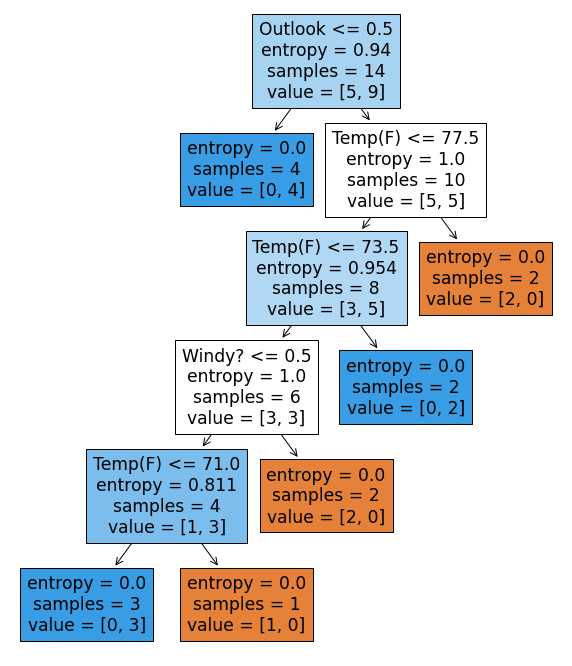

In [117]:
plt.figure(figsize=(10,12))
tree.plot_tree(model,filled=True,feature_names=X.columns)